In [143]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import _tconfint_generic

1. **Пусть $X∼F(x)$ — случайная величина с произвольным распределением, неизвестным математическим ожиданием $EX$ и известной дисперсией $DX$. Как выглядит доверительный интервал для $EX$ с приближённым уровнем доверия $100(1-\alpha)$%?**

$$ \overline{X}_n \pm z _{1 - \frac{a}{2}} \sqrt{\frac{DX}{n}} $$

---
---

2. **Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.**

    **Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.**

    **Будьте осторожны при использовании метода std()! Дело в том, что у объекта numpy он по умолчанию вычисляется как $\sqrt{ \frac{1}{n} \sum \limits_{i = 1}^n (X_i - \overline{X})^2 }$, а у объекта pandas — как $\sqrt{ \frac{1}{n-1} \sum \limits_{i = 1}^n (X_i - \overline{X})^2 }$.**
    
    **Нас интересует только второй вариант, несмещённая оценка стандартного отклонения.**
    
    **Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.**

In [105]:
df = pd.read_csv("water.txt", sep="\t")
df.drop("town", axis=1, inplace=True)

In [142]:
df.head(1)

,location,mortality,hardness
0,South,1247,105


In [129]:
std = df.mortality.std(ddof=1) 
n = df.shape[0]
std_mean = std / n**0.5
mean = df.mortality.mean()

t = stats.t.ppf(1 - 0.05/2, n-1)  # используем распределение Стьюдента

answ = list(
    map(
        lambda x: round(x, 4),
        (df.mortality.mean()  - t * std_mean, 
         df.mortality.mean()  + t * std_mean)
    )
)

print(mean)
print(answ)

answ = list(map(
    lambda x: round(x, 4),
    _tconfint_generic(mean, std_mean,
                      n - 1, 0.05, 'two-sided')
    )
)
print(answ)

1524.1475409836066
[1476.0833, 1572.2117]
[1476.0833, 1572.2117]


3. **На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.**

In [114]:
south = df[df.location == "South"]

In [130]:
south
n_s = south.shape[0]
std_mean_s = south.mortality.std(ddof=1) / n_s**0.5
mean_s = south.mortality.mean()
n_s, std_mean_s, mean_s

answ_s = list(map(
    lambda x: round(x, 4),
    _tconfint_generic(mean_s, std_mean_s, n_s - 1, 0.05, 'two-sided')
    )
)
print(answ_s)


[1320.1517, 1433.4636]


4. **На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?**


- Интервалы пересекаются; видимо, средняя смертность на севере и на юге существенно разная


- Интервалы пересекаются; похоже, средняя смертность на севере и на юге одинаковая


- **Интервалы не пересекаются; видимо, средняя смертность на севере и на юге существенно разная**


- Интервалы не пересекаются; похоже, средняя смертность на севере и на юге одинаковая

In [126]:
north = df[df.location == "North"]

In [147]:
n_n = north.shape[0]
std_mean_n = north.mortality.std(ddof=1) / n_n**0.5
mean_n = north.mortality.mean()

answ_n = list(map(
    lambda x: round(x, 4),
    _tconfint_generic(mean_n, std_mean_n, n_n - 1, 0.05, 'two-sided')
    )
)
print(answ_n)

[1586.5605, 1680.6395]


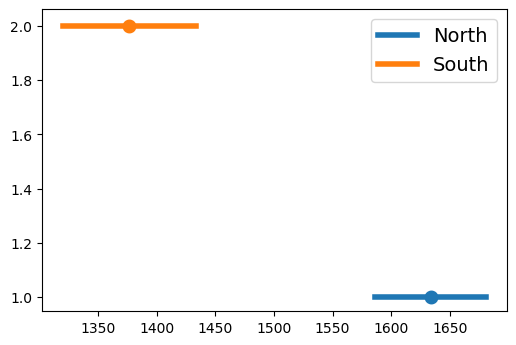

In [151]:
plt.figure(dpi=100)
plt.plot(answ_n, [1, 1], label="North", linewidth=4)
plt.scatter(mean_n, 1, linewidth=4)

plt.plot(answ_s, [2, 2], label="South", linewidth=4)
plt.scatter(mean_s, 2, linewidth=4)
plt.legend(fontsize=14);

---
---

**5. Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?**


- **Не пересекаются**


- Пересекаются


In [145]:
hard = []
for data in (south, north):
    hard.append(
        list(
            map(
                lambda x: round(x, 4),
                _tconfint_generic(
                    data.hardness.mean(),
                    data.hardness.std(ddof=1) / data.shape[0]**0.5,
                    data.shape[0] - 1,
                    0.05, 'two-sided')
            )
        )
    )
hard

[[53.4672, 86.0713], [21.4225, 39.3775]]

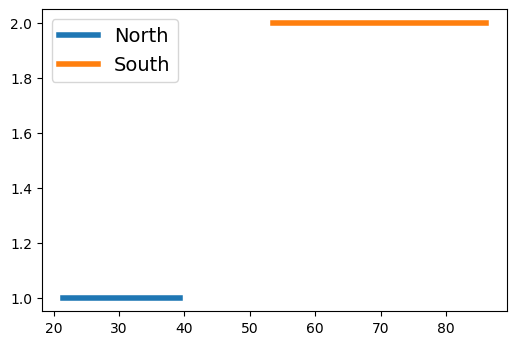

In [153]:
plt.figure(dpi=100)
plt.plot(hard[1], [1, 1], label="North", linewidth=4)
plt.plot(hard[0], [2, 2], label="South", linewidth=4)
plt.legend(fontsize=14);


---
---

**6. Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией $\sigma^2$:**

$$ \overline{X}_n \pm z _{1 - \frac{a}{2}} \frac{\sigma}{\sqrt{n}} $$


   **При $\sigma=1$ какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью $\pm 0.1$?**

$$ err = Z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$
$$ 0.1 = Z_{0.975} * \frac{1}{\sqrt{n}} $$
$$n = (Z_{0.975} / 0.1) ^ 2$$


In [43]:
#Z 1 - alpha / 2
error = 0.1
Z_num = stats.norm.ppf(1 - 0.05/2)
n = np.ceil((Z_num / 0.1)**2)
Z_num, int(n)

(1.959963984540054, 385)

**7. Объём выборки, необходимый для построения доверительного интервала заданной ширины:**


- уменьшается с ростом $\alpha$


- увеличивается с ростом дисперсии выборки


-  увеличивается с уменьшением требуемой ширины